# 

# Employee Attrition 



###  Problem statement: 
Employee attrition refers to the **percentage of workers who leave an organization and are replaced by new employees.** A high rate of attrition in an organization **leads to increased recruitment, hiring and training costs.** Not only it is costly, but qualified and competent replacements are hard to find.  The Attrition Prediction model **estimates the attrition risk for your employee populations in real-time.** The purpose of this case is to **uncover the factors that lead to employee attrition and explore important drivers of employee attrition.**

### Required Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import random
import math 

import matplotlib.pyplot as plt 
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,plot_precision_recall_curve,f1_score,accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn import tree

font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)

### Uploading Dataset 

In [2]:
data = pd.read_csv('attrition.csv')
data.drop('Unnamed: 0',axis=1, inplace=True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life_Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research_Development,8,Below_College,Life_Sciences,High,Male,...,Outstanding,Very_High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research_Development,2,College,Other,Very_High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research_Development,3,Master,Life_Sciences,Very_High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research_Development,2,Below_College,Medical,Low,Male,...,Excellent,Very_High,1,6,3,Better,2,2,2,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

###  Function to evaluate performance of Classification model

In [4]:
# I added in a few extra parameters so that I could save the results of the 
# performance metrics into a dataframe later to compare the results more 
# easily 

def evaluate(model, Y_test, X_test, X_train, Y_train, p_list, r_list, a_list, f_list): 
    """ Evaluates the model performance and appends performance results to performance lists
        
        (Additional) Parameters:
            p_list: list of precision scores
            r_list: list of recall scores
            a_list: list of accuracy scores
            f_list: list of f1-scores
    """
    
    # predict the target on the train dataset
    predict_train = model.predict(X_train)

    # Accuray Score on train dataset
    accuracy_train = accuracy_score(Y_train,predict_train)
    print('Accuracy Score on train dataset : ', round(accuracy_train,2))

    # predict the target on the test dataset
    predict_test = model.predict(X_test)

    # Accuracy Score on test dataset
    accuracy_test = accuracy_score(Y_test,predict_test)
    print('Accuracy_score on test dataset : ', round(accuracy_test,2), '\n')
    
    precision = precision_score(Y_test,  predict_test)
    recall = recall_score(Y_test,  predict_test)
    accuracy = accuracy_score(Y_test,  predict_test)
    F1_score = f1_score(Y_test,  predict_test)

    print('Model Performance')
    print('Precision: {}'.format(round(precision,2)))
    print('Recall: {}'.format(round(recall,2)))
    print('Accuracy:{}'.format(round(accuracy,2)))
    print('F1-score: : {}'.format(round(F1_score,2)),'\n')
    
    # Append the results to the performance results lists
    # So that we can add all the results to a final dataframe for comparison
    p_list = p_list.append(precision)
    r_list = r_list.append(recall)
    a_list = a_list.append(accuracy)
    f_list = f_list.append(F1_score)

### Hint: use below mentioned method to call classification 

In [5]:
tree_est = DecisionTreeClassifier() # instead of DecisionTreeRegressor()
forest_est = RandomForestClassifier() # instead of RandomForestRegressor()
gbm_est = GradientBoostingClassifier() # instead of GradientBoostingRegressor()
xgbc_est = XGBClassifier()             # instead of XGBRegresor()

# Questions

## 1.  Apply Proper Data Pre-Processign and EDA

In [6]:
# Describe the data
data.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,2.063946,6502.931293,14313.103401,2.693197,15.209524,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,1.106940,4707.956783,7117.786044,2.498009,3.659938,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,1.000000,2911.000000,8047.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,2.000000,4919.000000,14235.500000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,3.000000,8379.000000,20461.500000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,5.000000,19999.000000,26999.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:xlabel='Attrition', ylabel='Counts'>

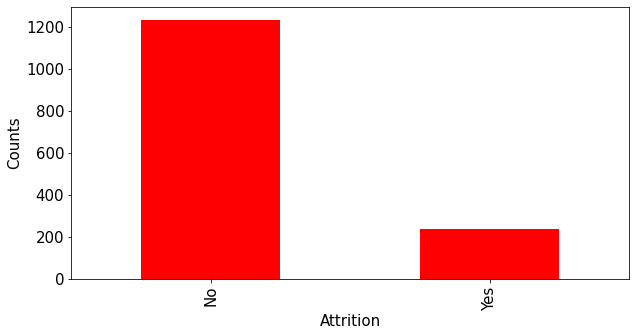

In [7]:
# plot the number of employees who left their company
# denoted with Attrition = yes

fig, ax = plt.subplots(figsize=(10,5))
data['Attrition'].value_counts().plot(ax=ax, 
                                    kind='bar', 
                                    xlabel='Attrition', 
                                    ylabel='Counts',
                                    color='red')
# plt.savefig('now_show.png')

From the plot above, we can see that a majority of the employees **did not leave their company.**

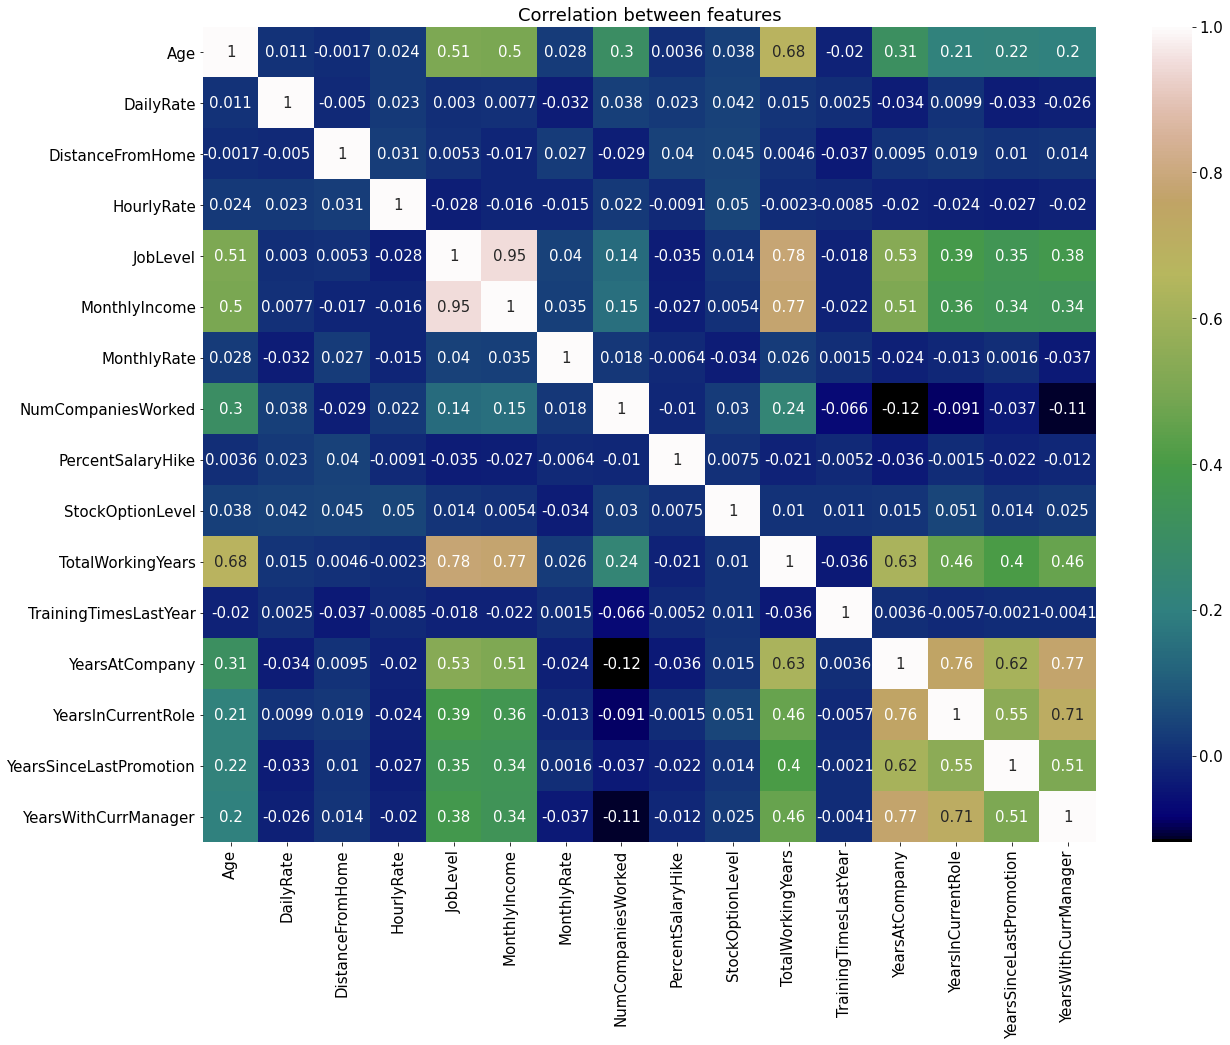

In [8]:
# Check the correlation between the features 
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cmap='gist_earth')
plt.title("Correlation between features")
plt.show()

The figure above shows the **correlation** between all integer type variables, with **higher correlations corresponding with warmer colours**. 

We can see that **Monthly Income** and **Job Level** are highly correlated with a correlation coefficient of **0.95**

From the figure we can also see that the pairs of variables that have a correlation coefficient of **0.7 or higher** include:

- **Job Level** and **Total Working Years** (0.78)
- **Monthly Income** and **Total Working Years** (0.77)
- **Years In Current Role** and **Years at Company** (0.76)
- **Years With Current Manager** and **Years at Company** (0.77)

We will keep all variables when running the regression because after I tested the models with the removal of some correlated variables, **the performance of the model decreased**
- Therefore, we need to be careful when interpreting the results of the models as some features are highly correlated

# Data Cleaning 

In [9]:
# Check to see if there are any null values 
data.isnull().values.any()

False

### Normalize Integer Values 

In [10]:
# We will normalize the interger values so that the results are easier to 
# interpret and compare
# First we will create a function to normalize the data in the dataframe 

def normalize(raw_data):
    """ Returns the dataframe after normalizing its values. Prints the first five results
        after standardizing the values. 
        
        Parameters:
            raw_data(DataFrame): a dataframe
            
        Returns:
            X (Dataframe): data with normalized values 
    """
    X = raw_data
    X = (X - X.mean()) / X.std()
    print(X.head(5))
    return X

In [11]:
# Now we will normalize the column values for all columns that have integer values 

norm_df = normalize(data[data.columns[data.dtypes=='int64']])

        Age  DailyRate  DistanceFromHome  HourlyRate  JobLevel  MonthlyIncome  \
0  0.446199   0.742274         -1.010565    1.382668 -0.057768      -0.108313   
1  1.321915  -1.297333         -0.147100   -0.240595 -0.057768      -0.291619   
2  0.008340   1.413882         -0.887213    1.284288 -0.961159      -0.937335   
3 -0.429518   1.460969         -0.763861   -0.486544 -0.961159      -0.763374   
4 -1.086306  -0.524116         -0.887213   -1.273580 -0.961159      -0.644639   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
0     0.725773            2.124413          -1.150163         -0.931697   
1     1.488370           -0.677819           2.128582          0.241906   
2    -1.674271            1.323775          -0.057248         -0.931697   
3     1.242788           -0.677819          -1.150163         -0.931697   
4     0.325789            2.524732          -0.876934          0.241906   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \

### Dummy Encoding 

In [12]:
# Encode all categorical variables into dummy variables 
# except for our outcome target variable, Attrition

dum_df = pd.get_dummies(data, 
                        columns=data.columns[data.dtypes=='object'].drop('Attrition'))

In [13]:
# Replace the integer columns with the normalized values found in norm_df

# Drop the columns with the original integer values
dum_df = dum_df.drop(columns=dum_df.columns[dum_df.dtypes=='int64'], axis=1)

In [14]:
# Append the normalized integer values to the dummy variables data frame
total_df = pd.concat([dum_df, norm_df], axis=1)
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 72 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Attrition                           1470 non-null   object 
 1   BusinessTravel_Non-Travel           1470 non-null   uint8  
 2   BusinessTravel_Travel_Frequently    1470 non-null   uint8  
 3   BusinessTravel_Travel_Rarely        1470 non-null   uint8  
 4   Department_Human_Resources          1470 non-null   uint8  
 5   Department_Research_Development     1470 non-null   uint8  
 6   Department_Sales                    1470 non-null   uint8  
 7   Education_Bachelor                  1470 non-null   uint8  
 8   Education_Below_College             1470 non-null   uint8  
 9   Education_College                   1470 non-null   uint8  
 10  Education_Doctor                    1470 non-null   uint8  
 11  Education_Master                    1470 no

### Mapping Attrition to binary variable 

In [15]:
# Now we will change the no values found in Attrition to 0 
# and the yes values to 1
clean_df = total_df.copy()
map_attrition = {'No': 0, 'Yes': 1}
clean_df['Attrition'] = total_df['Attrition'].map(map_attrition)

## 2. Split dataset to Trains and Test set (dont forget to set the seed)

In [16]:
# Split the data
X = clean_df.loc[:,clean_df.columns!='Attrition'].values
Y = clean_df.loc[:, 'Attrition'].values

# Split the data into training and testing 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

## 3. Fit Tree Classifier to the Train set (tune paramters) and evaluate performance using evalute() function

In [17]:
# Create lists to store the evaluation results so that we can create a dataframe
# to compare
p_list = [] 
r_list = []
a_list = []
f_list = []
model = [] # list of model names in string format

In [18]:
tree_1 = DecisionTreeClassifier(random_state = 42)

# fit the model with the training data
model = tree_1.fit(X_train,Y_train)

evaluate(tree_1, Y_test, X_test,X_train,Y_train, p_list, r_list, a_list, f_list)

Accuracy Score on train dataset :  1.0
Accuracy_score on test dataset :  0.8 

Model Performance
Precision: 0.4
Recall: 0.4
Accuracy:0.8
F1-score: : 0.4 



From this model's results, we can see that the **there is no training error** and that there is a notable difference between the training and testing error, therefore we can say that the model has **low bias and higher variance.** Since there is low bias and high variance, we can say that the model is **slightly overfitting** on the data provided in the training set.

### Tune Parameters and Re-Evaluate

In [19]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [20, 50, 80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5, 10],
    'min_samples_split': [8, 10, 12 , 17],
    'random_state' : [2]
}

# Instantiate the grid search model
tree_cv = GridSearchCV(estimator = tree_est, param_grid = param_grid, scoring = 'f1', cv = 10, n_jobs = -1, verbose = 2)
model = tree_cv.fit(X_train, Y_train)
evaluate(tree_cv, Y_test, X_test,X_train,Y_train, p_list, r_list, a_list, f_list)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Accuracy Score on train dataset :  0.9
Accuracy_score on test dataset :  0.85 

Model Performance
Precision: 0.56
Recall: 0.31
Accuracy:0.85
F1-score: : 0.4 



For this assignment, we are trying to uncover the factors that lead to employee attrition. In this case, we would like to **prevent** increased rates of employee attrition as **high rates lead to higher costs.**

The tree models here are trying to classify employees based off of their recorded characteristics and using those characteristics, the model will try to **predict whether or not the employee will leave the company.**

There are two kinds of errors that the model can produce, **type I and type II errors**. Type I refers the **false positive predictions**, which in this case would be when the model **predicts that an employee has left the company**, when in reality, **the employee did not.** Type II error refers to the **false negative** predicitons, where the model predicts that an **employee did not leave the company when in reality they did leave the company.**

Since it is very costly when employees leave a company, under a conservative standpoint, it would be **worse to make more false negative (type II) predictions** as you may be underestimating the company's attrition rate. Therefore, to minimize the number of false negative **we could use recall as our scoring method.**

However, having a low false negative rate and a high false positive rate could also be concerning, **so we will be using the f1-score** as it is an average between the precision and recall scores of the model, where high precision minimizes the false positive rate. 

After tuning the parameters of the tree classification model, we can see that the **accuracy on the training data set decreased**, indicating that there is a **higher training error.** However, we can also see that the accuracy of the test set increased, therefore lowering the test set errors. The model moved towards a **higher bias and lower variance than before**, which means that the model is **moving away from overfitting** the training data, **resulting in a better model.**

## 4. Fit Random Forest to the Train set (tune parameters) and evaluate performance using evalute() function

In [20]:
# Show the Confusion matrix and accaracy score for the model on the test data
forest = RandomForestClassifier(n_estimators=10, random_state = 42)
forest.fit(X_train, Y_train)

evaluate(forest, Y_test, X_test,X_train,Y_train, p_list, r_list, a_list, f_list)

Accuracy Score on train dataset :  0.99
Accuracy_score on test dataset :  0.86 

Model Performance
Precision: 0.77
Recall: 0.21
Accuracy:0.86
F1-score: : 0.33 



After running the Random Forest Model, we can see that the training error is very low(**low bias**), while the testing error is a bit higher causing a gap between the training and testing error(**high variance**). This means that the model is **slightly overfitting** on the training dataset again. 

### Tune Parameters and Re-Evaluate

In [21]:
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3, 5, 10],
    'min_samples_split': [8, 10, 12],
    'random_state' : [2]
}

forest_cv = GridSearchCV(estimator = forest_est, param_grid = param_grid,  scoring = 'f1', cv = 10, n_jobs = -1, verbose = 2)
forest_cv.fit(X_train, Y_train)
evaluate(forest_cv, Y_test, X_test,X_train,Y_train, p_list, r_list, a_list, f_list)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Accuracy Score on train dataset :  0.93
Accuracy_score on test dataset :  0.86 

Model Performance
Precision: 0.71
Recall: 0.21
Accuracy:0.86
F1-score: : 0.32 



After tuning the model, we can see that the training error increased, while the testing error stayed the same. This shows that the **bias increased while the variance decreased** since the difference between the training and testing errors decreased. From this, we know that **the model improved** in comparison to before since the **model is moving away from overfitting** the training set data. 

## 5. Fit GBM  model to the Train Set and evaluate performance using evalute() function

In [22]:
gbm = GradientBoostingClassifier(n_estimators=100, max_depth=5,random_state = 42)
gbm.fit(X_train, Y_train)
evaluate(gbm, Y_test, X_test,X_train,Y_train, p_list, r_list, a_list, f_list)

Accuracy Score on train dataset :  1.0
Accuracy_score on test dataset :  0.85 

Model Performance
Precision: 0.57
Recall: 0.25
Accuracy:0.85
F1-score: : 0.35 



Here the training error is very low (**low bias**) and there is a 0.15 difference between the training and testing error, resulting in a **higher variance.**

### Tune Parameters and Re-Evaluate

In [23]:
param_grid = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
     'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
     'random_state' : [2]
    }

gbm_cv = GridSearchCV(estimator = gbm_est, param_grid = param_grid, scoring = 'f1',cv = 2, n_jobs = -1, verbose = 2)
gbm_cv.fit(X_train, Y_train)
evaluate(gbm_cv, Y_test, X_test,X_train,Y_train, p_list, r_list, a_list, f_list)

Fitting 2 folds for each of 70 candidates, totalling 140 fits
Accuracy Score on train dataset :  0.99
Accuracy_score on test dataset :  0.86 

Model Performance
Precision: 0.68
Recall: 0.31
Accuracy:0.86
F1-score: : 0.43 



After tuning the model, we can see that the **bias increased and the variance decreased** as training set error increased, and the difference between the two decreased.

## 6. Fit XGBoost  model to the Train Set and evaluate performance using evalute() function

In [24]:
xgbc = XGBClassifier(random_state = 42)
xgbc.fit(X_train, Y_train)
evaluate(xgbc, Y_test, X_test,X_train,Y_train, p_list, r_list, a_list, f_list)

[16:19:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy Score on train dataset :  1.0
Accuracy_score on test dataset :  0.86 

Model Performance
Precision: 0.67
Recall: 0.29
Accuracy:0.86
F1-score: : 0.41 



Here we see that there is low bias and higher variance. 

### Tune Parameters and Re-Evaluate

In [25]:
param_grid = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
     'max_depth': [1,2,3,4,5,10],
     'random_state' : [2]
    }

xgbc_cv = GridSearchCV(estimator = xgbc, param_grid = param_grid, scoring = 'f1',cv = 2, n_jobs = -1, verbose = 2)
xgbc_cv.fit(X_train, Y_train)
evaluate(xgbc_cv, Y_test, X_test,X_train,Y_train, p_list, r_list, a_list, f_list)

Fitting 2 folds for each of 42 candidates, totalling 84 fits
[16:19:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score on train dataset :  0.94
Accuracy_score on test dataset :  0.87 

Model Performance
Precision: 0.75
Recall: 0.31
Accuracy:0.87
F1-score: : 0.44 



/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


After tunning the model, we can see that the **bias (training error) increased** and the **variance is now much smaller as the testing error decreased**, causing the difference between the training and testing error to decrease. 

## 7. Compare the performance of four developed models

In [26]:
# Create the dataframe containing the performance evaluations of the four models

# Create a list of model names 
# RF stands for Random Forest and * indicate the tuned models 
models = ['Tree', 'Tree*', 
          'RF', 'RF*', 
          'GBM', 'GBM*', 
          'XGB', 'XGB*']

perf_data = {'Precision': p_list, 'Recall': r_list, 'Accuracy': a_list, 'F1-score': f_list}
performance_df = pd.DataFrame(data=perf_data, index=models)

In [27]:
# Show the table containing data on the performance measures for each model
performance_df

,Precision,Recall,Accuracy,F1-score
Tree,0.395833,0.395833,0.802721,0.395833
Tree*,0.555556,0.312500,0.846939,0.400000
RF,0.769231,0.208333,0.860544,0.327869
RF*,0.714286,0.208333,0.857143,0.322581
GBM,0.571429,0.250000,0.846939,0.347826
GBM*,0.681818,0.312500,0.863946,0.428571
XGB,0.666667,0.291667,0.860544,0.405797
XGB*,0.750000,0.312500,0.870748,0.441176


Text(0, 0.5, 'Score')

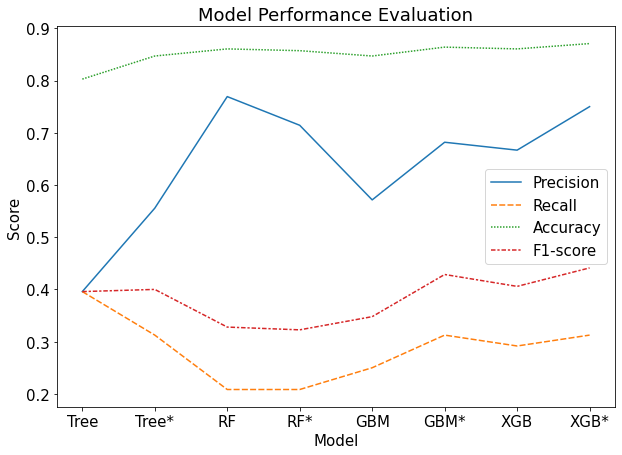

In [28]:
# We can plot the performance results to see which model performed better in which aspects
plt.figure(figsize=(10,7))
sns.lineplot(data=performance_df)
plt.title("Model Performance Evaluation")
plt.xlabel("Model")
plt.ylabel("Score")

The plot above shows the four performance measures across the different models. We can see that:
- The **accuracy of the models steadily increases** as the models go from Tree Classifier to XGBoost 
- The random forest model has a **very high precision rate** compared to the the Tree Classifier
- The **recall score of all the models are very low, indicating that the models tend to have high false negative rates**

In [29]:
# We can also search for the model with the highest scores for each performance measure 

# Create a list of measures we want to look at 
measures = ['Precision', 'Recall', 'Accuracy', 'F1-score']
max_results = {} # Create a dictionary to store the highest scoring model results

# loop over the performance measures and find the model with the highest score for each
for measure in measures:
    max_results['Max ' + measure + ' Model'] = performance_df[performance_df[measure]==performance_df[measure].max()].reset_index().rename(columns={'index':'Model'})

# Print out the Results 
for key in max_results:
    print(key,':', max_results[key]['Model'].item())

Max Precision Model : RF
Max Recall Model : Tree
Max Accuracy Model : XGB*
Max F1-score Model : XGB*


From the results above we can see that the model with the highest precision is the random forest model before tuning, the one with the highest recall was the tree classifer before tuning and **the model with the best accuracy and f-1 score was the tuned XGBoost model.**

## 8. Is the data imbalanced? Is it causing problem in your model(s)? Which of them? Why?

During the beginning of the assignment we saw that there were much more employees who did not leave the company in comparison to ones that actually did leave the company:

<AxesSubplot:xlabel='Attrition', ylabel='Counts'>

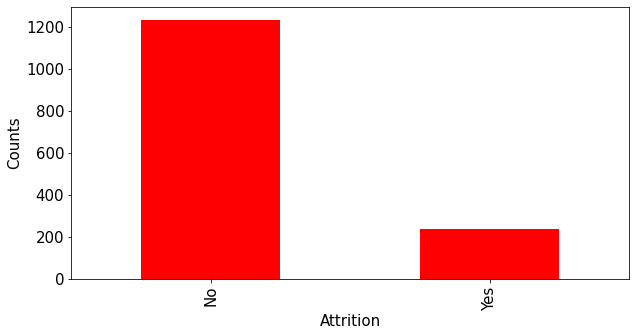

In [30]:
# plot the number of employees who left their company
# denoted with Attrition = yes

fig, ax = plt.subplots(figsize=(10,5))
data['Attrition'].value_counts().plot(ax=ax, 
                                    kind='bar', 
                                    xlabel='Attrition', 
                                    ylabel='Counts',
                                    color='red')
# plt.savefig('now_show.png')

As a result, the classes between employees who did and did not leave their company are **not equally represented** which can lead to **problems with the performance measures of each model.**


Based on the methods of each model, I think that the **tree classifier model** is the model that is most affected by the class inbalance problem. The tree classifier model classfies the data based on its chosen splitting criteria without any alterations to the original data. On the other hand, models like the random forest, BGM and XGBoost are enemble methods that combine multiple models to produce a more powerful one. These models use a method called **bootstrapping** which generates smaller random samples of the data under the assumption that the **samples are representative** of the larger data set and that the smaller **samples are not too corrleated** with each other. However, since the smaples are representative of the larger data, I think that these **models would still be affected by the class inbalance issue** unless they implement methods like undersampling or oversampling alongside their bootstrapped samples. 

Since there is a class inbalance issue, the **accuracy, recall and precision** scores may not be accurate as the models could be accurately predicting the majority class while doing worse for the minority class. As a result, it would be **best to evaluate using the f1 score**, as it is an average of the precision and recall, which makes it less likely to be biased to the majority or minority classes. 

## 9. Derive important features using the best performed model

In [31]:
# Since the XGBoost model had the best model performance 
# based off of the four performance measures
# we will use the model to derve the most important features

k=clean_df.drop('Attrition', axis=1).columns
feature_imp = pd.Series(xgbc.feature_importances_,index=k).sort_values(ascending=False)

No handles with labels found to put in legend.


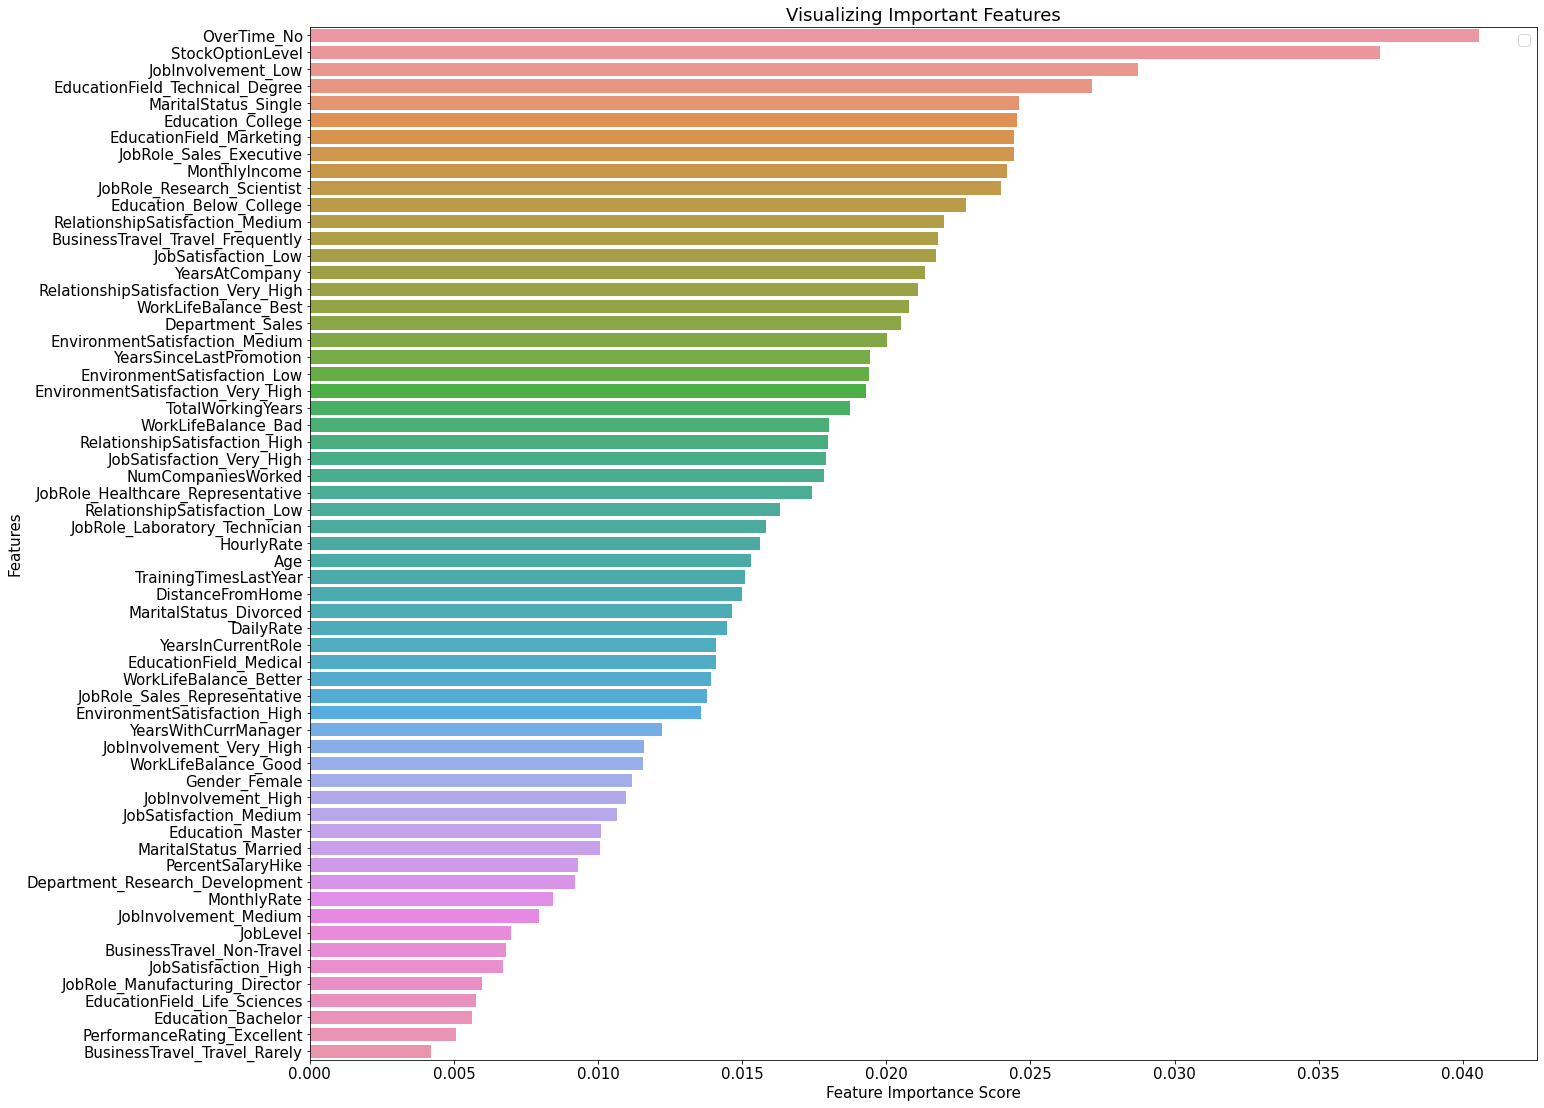

In [32]:
# Creating a bar plot
plt.figure(figsize=(22,19))
sns.barplot(x=feature_imp[feature_imp>0], y=feature_imp.index[feature_imp>0])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Here we can see that the most important feature is the variable **OverTime**, followed by **StockOptionLevel** then **JobInvolvement**. However, if we look at the **Feature Importance Score** on the x-axis, we can see that even though these are our most important features, their **importance scores are still very small.**

## 10. Add transparacy to your modeling results 

<Figure size 720x504 with 0 Axes>

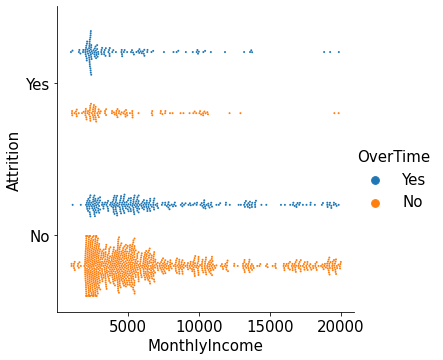

In [33]:
plt.figure(figsize=(10,7))
sns.catplot(data=data, 
            kind='swarm', 
            x="MonthlyIncome",
            y="Attrition", 
            hue='OverTime',
            dodge=True,
            s=2)

Here we can see that:
- there are **far less** individuals who have **higher monthly income and have left their company**
- a large amount of individuals who have **no overtime have also not left their company**

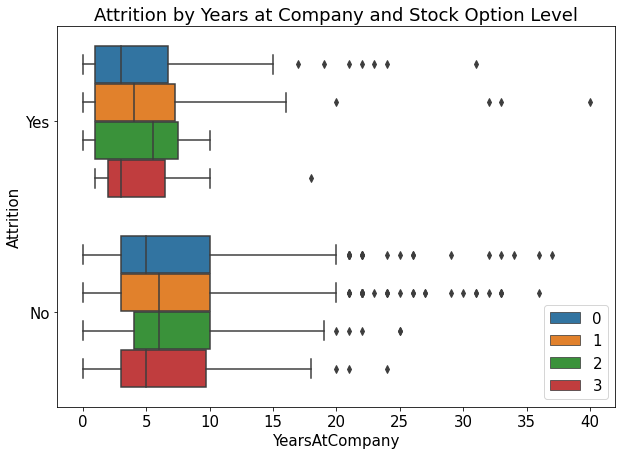

In [34]:
plt.figure(figsize=(10,7))
sns.boxplot(x='YearsAtCompany',y='Attrition', hue='StockOptionLevel', data=data)
plt.title('Attrition by Years at Company and Stock Option Level')
plt.legend(loc='lower right')
plt.show()

This plot shows that:
- on average people who have left their company have **spent less years at the company** than people who have stayed at the company
- people who have left the company have also recieved less stock options at each level.

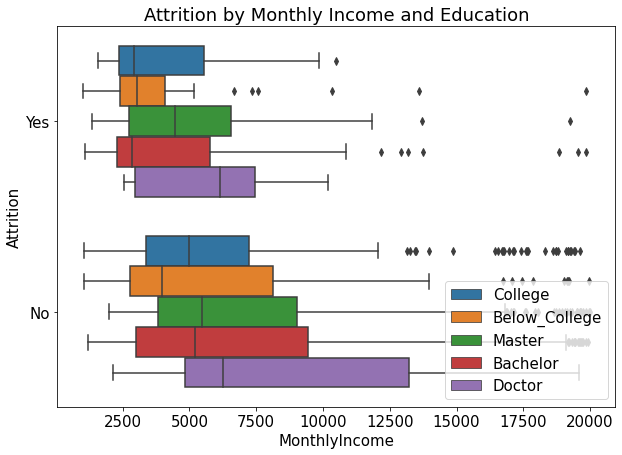

In [35]:
plt.figure(figsize=(10,7))
sns.boxplot(x='MonthlyIncome',y='Attrition', hue='Education', data=data)
plt.title('Attrition by Monthly Income and Education')
plt.legend(loc='lower right')
plt.show()

We can see that:
- on average, monthly income tends to increase as the level of education increases
- individuals who have left their company on average have a **lower monthly income** than those who have stayed in the company **and have the same level of education.**

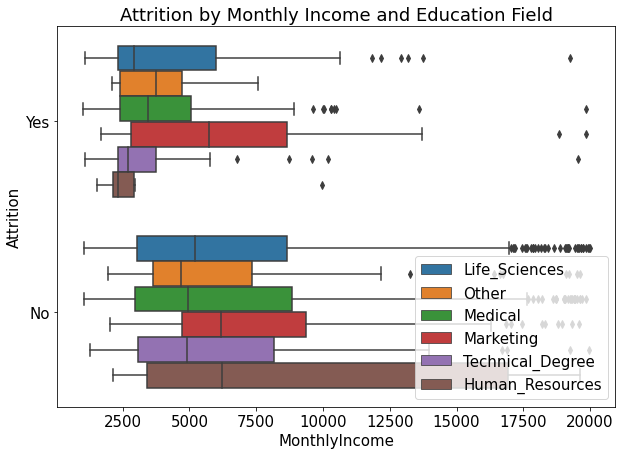

In [36]:
plt.figure(figsize=(10,7))
sns.boxplot(x='MonthlyIncome',y='Attrition', hue='EducationField', data=data)
plt.title('Attrition by Monthly Income and Education Field')
plt.legend(loc='lower right')
plt.show()

From this plot we can see that:
- there is a big difference in the **average and range of incomes of individuals** with **technical or HR degrees** who have left the company versus those who have not left the company
- On average, the monthly income of those who have left the company is lower than the ones who have stayed, holding the education field constant

## 11. Suggest proper solution to reduce the attrition rate.

After finding out that the **XGBoost model performed the best**, we used to model to find the most important features in the model. Using the more relevant features, we were able to create some plots that illustrated some characteristics of individuals who have left the company versus those who have stayed. From these plots, in order to reduce the attrition rate, we suggest the company take the following into consideration:
- **Reducing the amount of overtime** employees need to take
    - A company could **analyze their overtime culture to see if overtime is something that is very normalized**. If so, they company could work towards encouraging employees to finish their work within hours and treating overtime as a last minute exception instead of a standard that everyone needs to follow
    - Or instead, the company could also ensure that employees are cross-trained so that responsibilities could be shared when in need to reduce the amount of overtime  
- Ensure that **employees are fairly compensated**
    - From the plots, it seems that some employees may work in the **same field or have the same amount of education**, however their **monthly income or stock option levels vary**. There seems to be a relationship between compensation and attrition as on average as we can see that **individuals who recieve less monthly income have left their companies when their counterparts with in the same field or with the same amount of education have higher monthly incomes**
        - However, this may not be a completely accurate assumption as there are other underlying unobserved factors that may also affect an individual's monthly income, for example, an individual's problem solving skills or work efficiency.